# Вебинар 3. Визуализация и анализ данных.

**Подключение библиотек и скриптов**

In [1]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.image as img
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
matplotlib.rcParams.update({'font.size': 14})

**Пути к директориям и файлам**

In [3]:
PREPARED_DATASET_PATH = '~/downloads/Архив/housing_prepared.csv'
CALIFORNIA_MAP_PATH = 'California_Map.png'

### Загрузка данных

**Описание датасета**

Статистические данные о ряде домов в Калифорнии, основанные на переписи 1990 года.

* **longitude** - долгота
* **latitude** - широта
* **housing_median_age** - средний возраст дома
* **total_rooms** - общее количество комнат
* **total_bedrooms** - общее количество спален
* **population** - количество проживающих
* **households** - домохозяйства
* **ocean_proximity** - близость океана
* **median_income** - средний доход
* **median_house_value** - средняя стоимость дома

In [4]:
df = pd.read_csv(PREPARED_DATASET_PATH)
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id,bedroom_share,population_per_room,-,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,0,14.659091,0.365909,0,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,1,15.579659,0.338217,0,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,2,12.951602,0.338105,0,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,3,18.445840,0.437991,0,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,4,17.209588,0.347265,0,0,0,0,1,0


In [5]:
def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.        
    """
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
#                 if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
#                     df[col] = df[col].astype(np.float16)
#                 elif

                if c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    
    return df

In [6]:
df = reduce_mem_usage(df)

Memory usage of dataframe is 2.99 MB
Memory usage after optimization is: 1.04 MB
Decreased by 65.1%


In [7]:
df.dtypes

longitude               float32
latitude                float32
housing_median_age      float32
total_rooms             float32
total_bedrooms          float32
population              float32
households              float32
median_income           float32
median_house_value      float32
ocean_proximity        category
id                        int16
bedroom_share           float32
population_per_room     float32
-                          int8
<1H OCEAN                  int8
INLAND                     int8
ISLAND                     int8
NEAR BAY                   int8
NEAR OCEAN                 int8
dtype: object

### Анализ целевой переменной

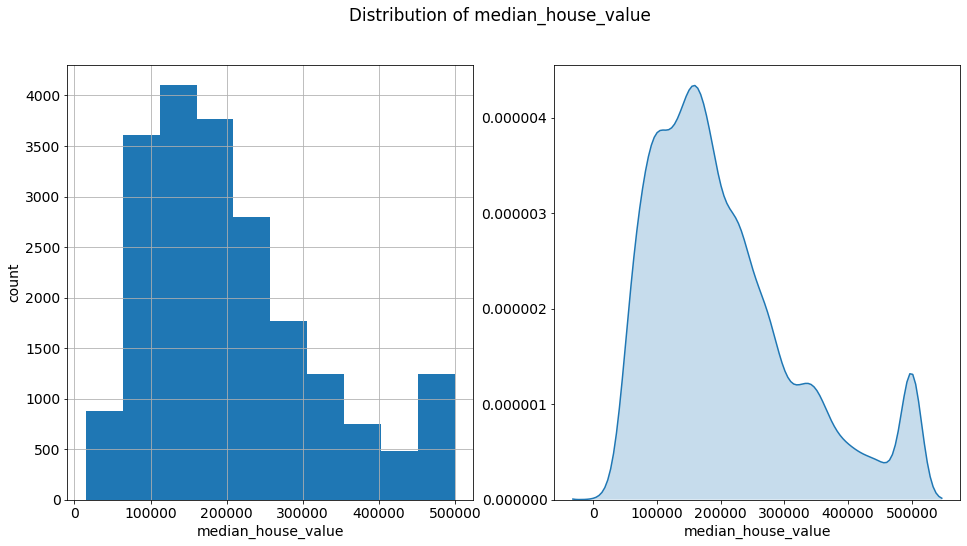

In [8]:
plt.figure(figsize = (16, 8))

plt.subplot(121)
df['median_house_value'].hist()
plt.ylabel('count')
plt.xlabel('median_house_value')

plt.subplot(122)
sns.kdeplot(df['median_house_value'], shade=True, legend=False)
plt.xlabel('median_house_value')

plt.suptitle('Distribution of median_house_value')
plt.show()

In [9]:
target_mean = round(df['median_house_value'].mean(), 2)
target_median = df['median_house_value'].median()
target_mode = df['median_house_value'].mode()[0]

target_mean, target_median, target_mode

(206854.97, 179700.0, 500001.0)

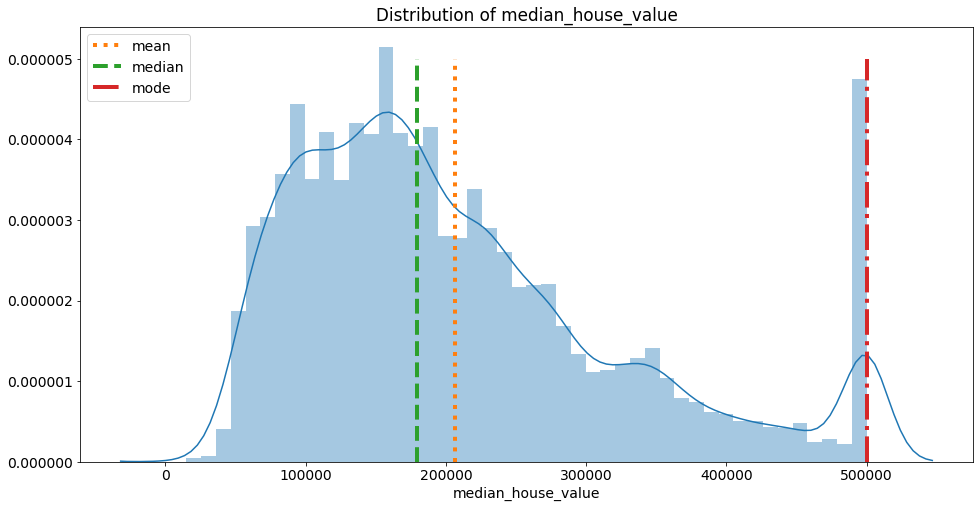

In [10]:
plt.figure(figsize = (16, 8))

sns.distplot(df['median_house_value'])

y = np.linspace(0, 0.000005, 100)
plt.plot([target_mean] * 100, y, label='mean', linestyle=':', linewidth=4)
plt.plot([target_median] * 100, y, label='median', linestyle='--', linewidth=4)
plt.plot([target_mode] * 100, y, label='mode', linestyle='-.', linewidth=4)

plt.title('Distribution of median_house_value')
plt.legend()
plt.show()

### Оценка распредения целевой переменной в разрезе других признаков

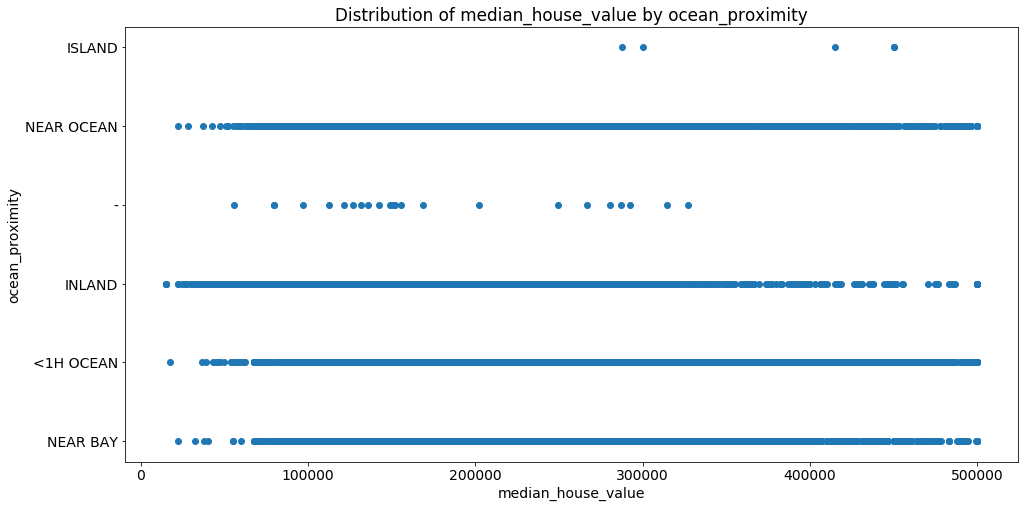

In [11]:
plt.figure(figsize=(16, 8))

plt.scatter(df['median_house_value'], df['ocean_proximity'])

plt.xlabel('median_house_value')
plt.ylabel('ocean_proximity')
plt.title('Distribution of median_house_value by ocean_proximity')
plt.show()

**Box plot**

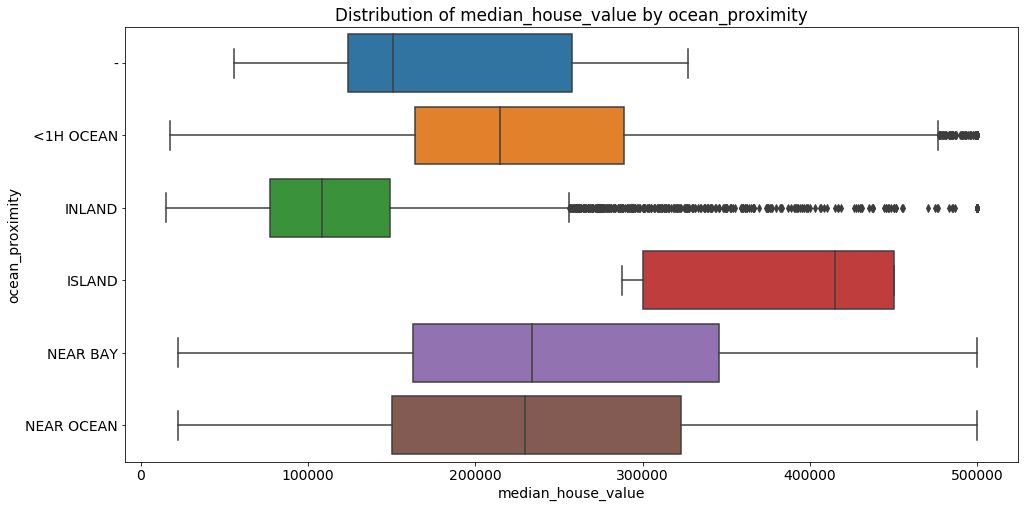

In [12]:
plt.figure(figsize=(16, 8))

sns.boxplot(df['median_house_value'], df['ocean_proximity'])

plt.xlabel('median_house_value')
plt.ylabel('ocean_proximity')
plt.title('Distribution of median_house_value by ocean_proximity')
plt.show()

**Violin plot**

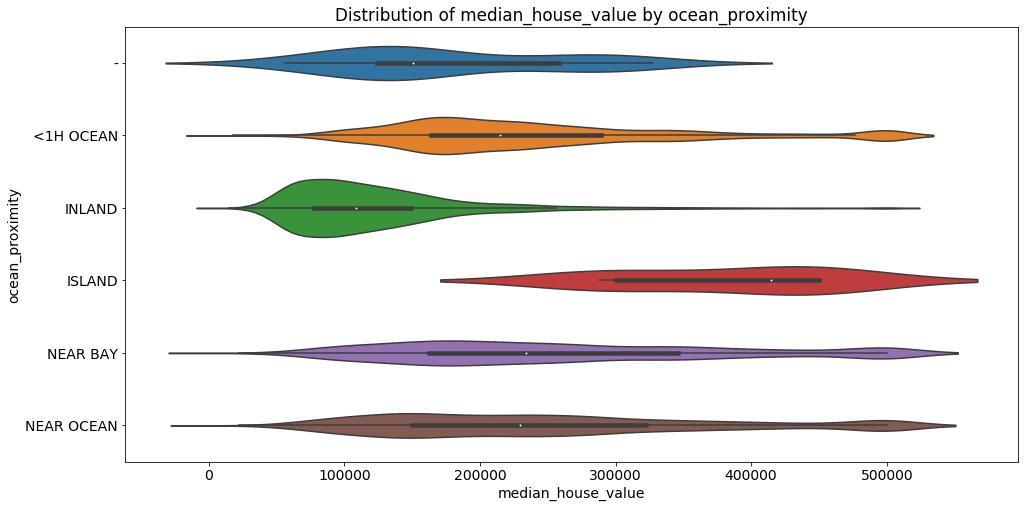

In [13]:
plt.figure(figsize=(16, 8))

sns.violinplot(df['median_house_value'], df['ocean_proximity'])

plt.xlabel('median_house_value')
plt.ylabel('ocean_proximity')
plt.title('Distribution of median_house_value by ocean_proximity')
plt.show()

### Анализ признаков

**Количественные признаки**

In [20]:
df_num_features = df.select_dtypes(include='float32')

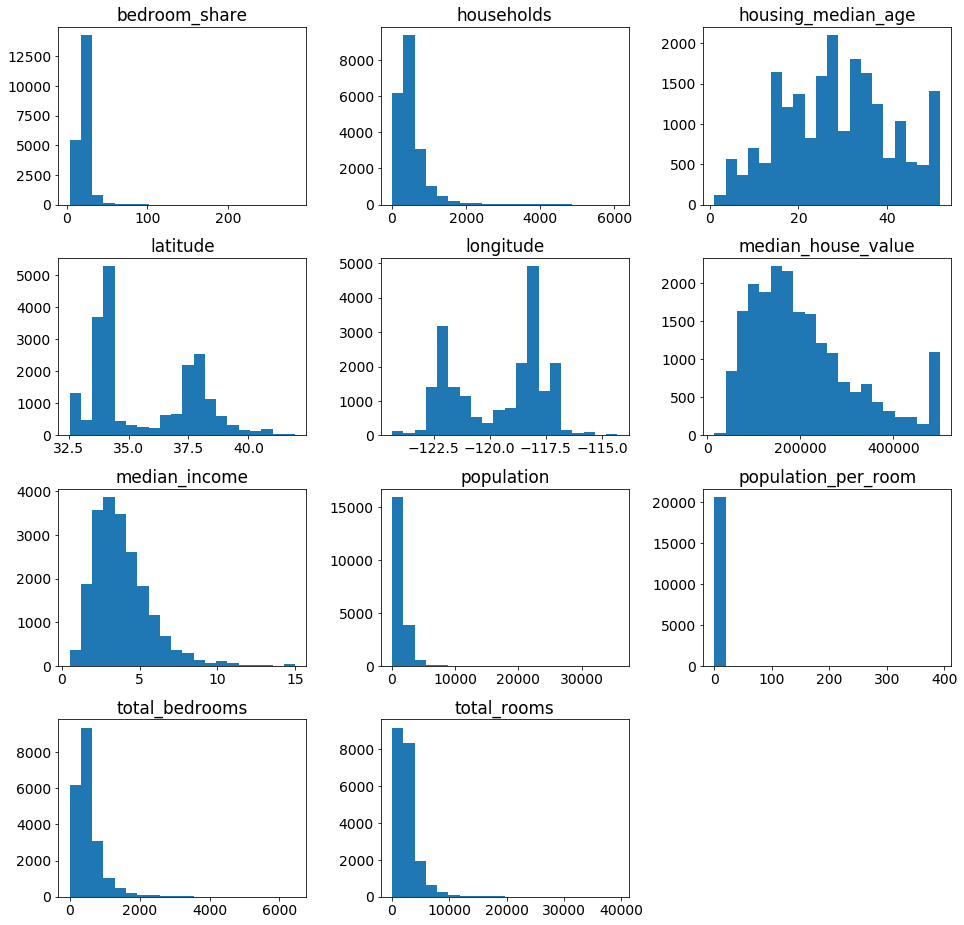

In [21]:
df_num_features.hist(figsize=(16,16), bins=20, grid=False);

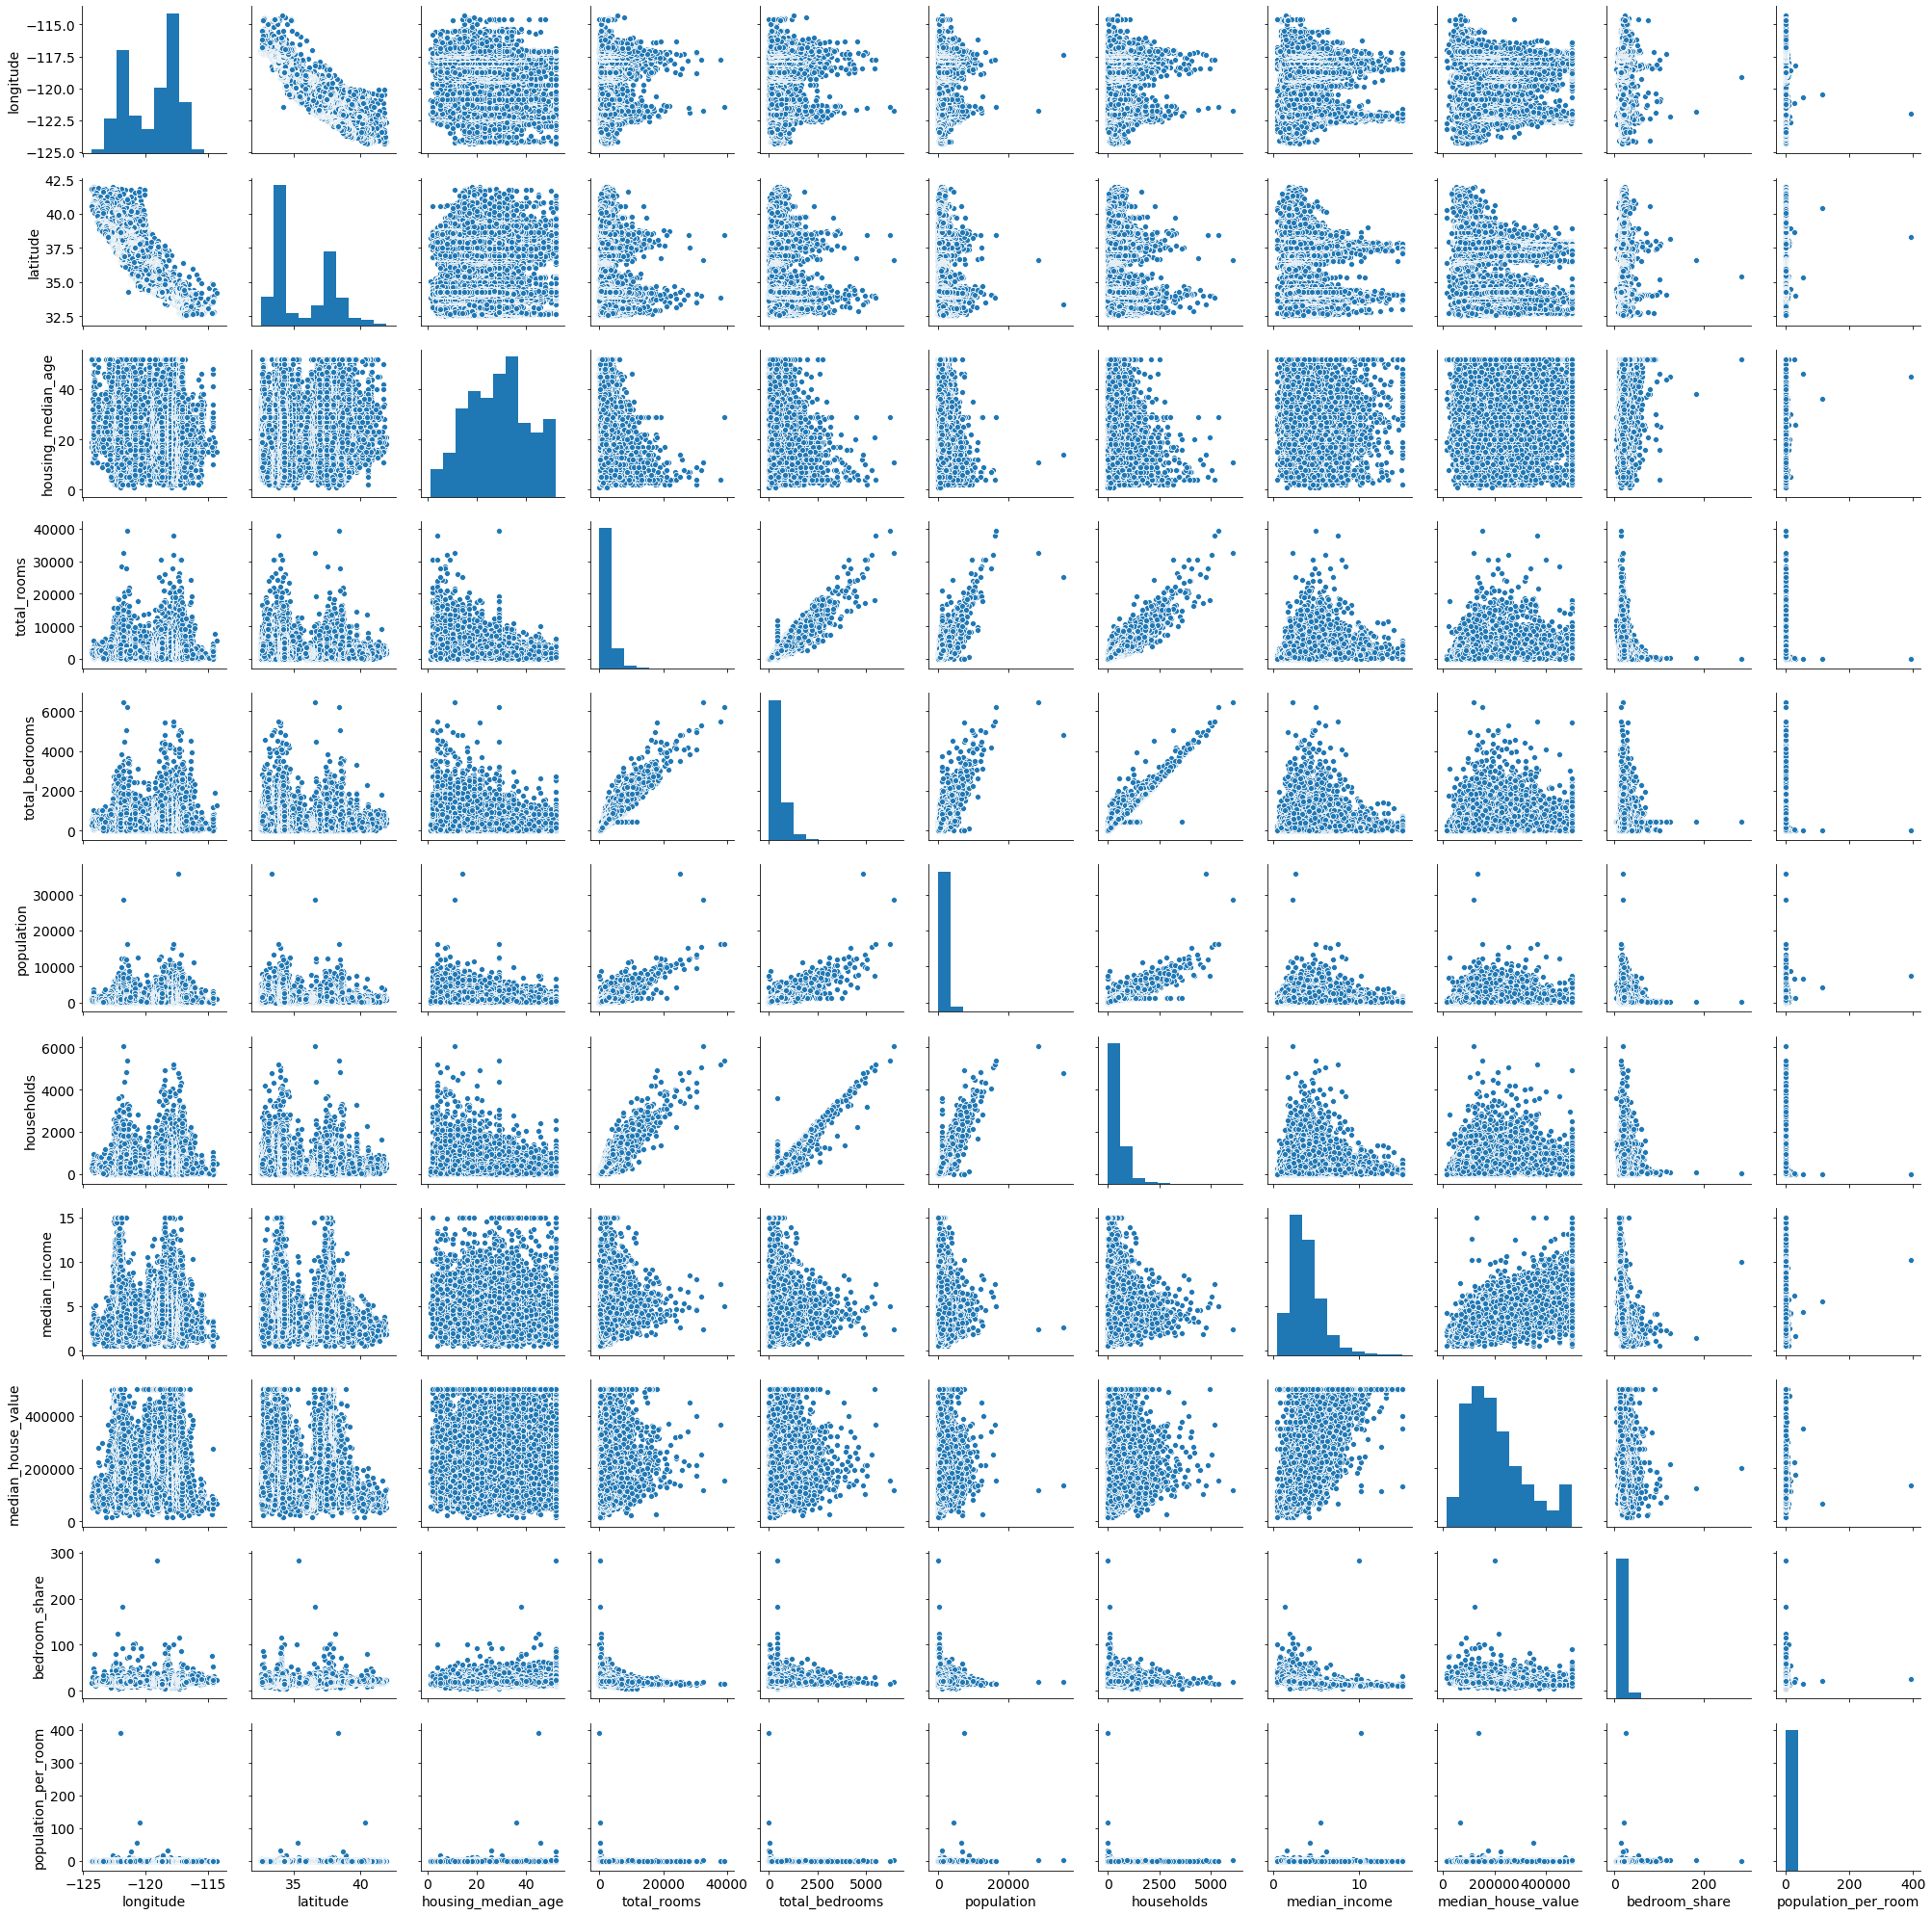

In [22]:
sns.pairplot(df_num_features);

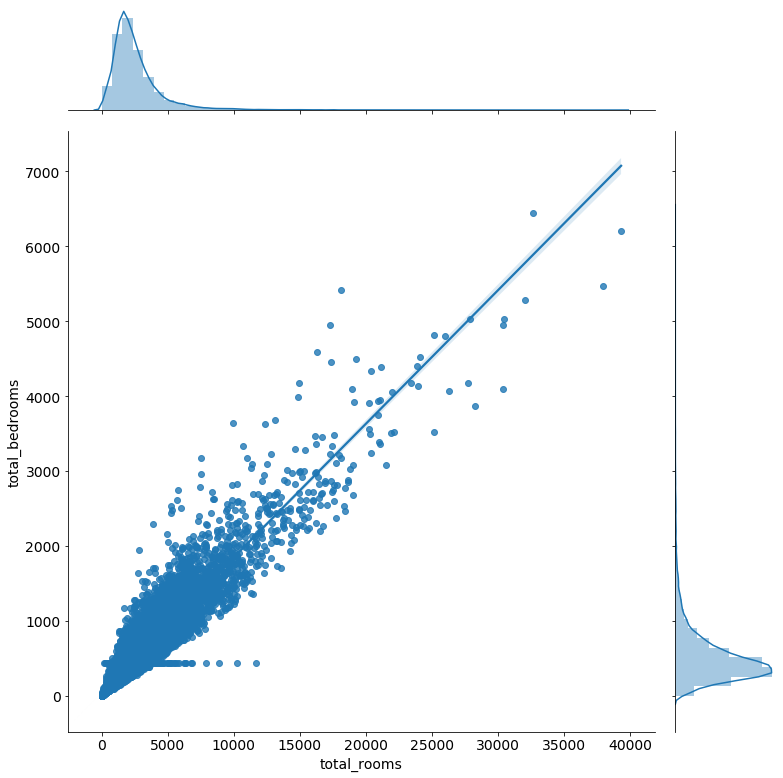

In [23]:
grid = sns.jointplot(df['total_rooms'], df['total_bedrooms'], kind='reg')
grid.fig.set_figwidth(12)
grid.fig.set_figheight(12)

plt.show()

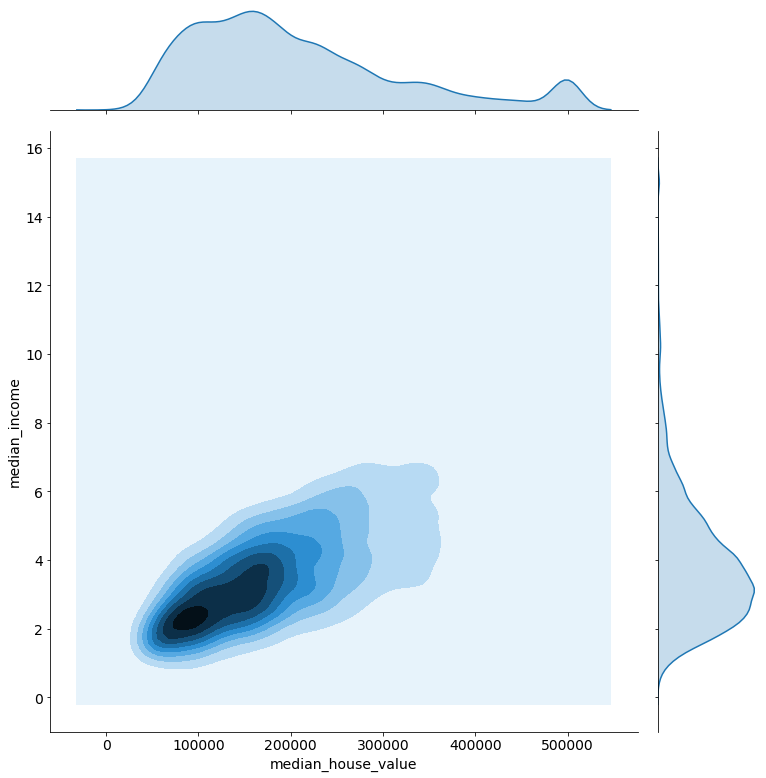

In [24]:
grid = sns.jointplot(df['median_house_value'], df['median_income'], kind='kde')
grid.fig.set_figwidth(12)
grid.fig.set_figheight(12)

plt.show()

**Бинарные признаки**

In [25]:
df = df[df.columns[:-1]]


In [26]:
df_bin_features = df.select_dtypes(include='int64')

In [27]:
# sns.set(font_scale=1.4)
plt.figure(figsize = (16,16))

for i, colname in enumerate(df_bin_features.columns):
    counts = df_bin_features[colname].value_counts()
    
    plt.subplot(3,2,i+1)    
    plt.title(colname)
    sns.barplot(counts.index, counts.values)
    
plt.show()

<Figure size 1152x1152 with 0 Axes>

### Матрица корреляций

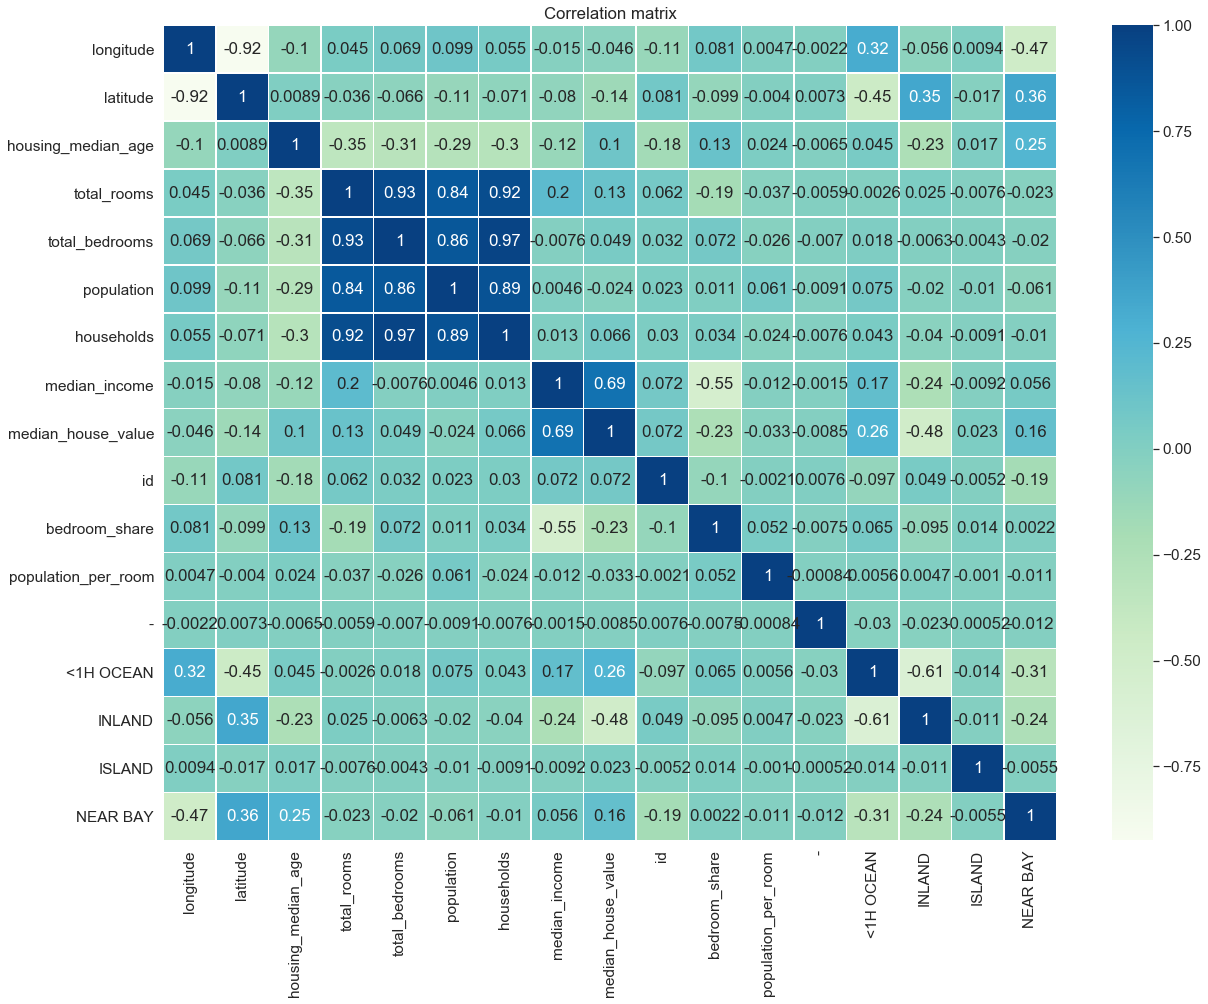

In [28]:
plt.figure(figsize = (20,15))

sns.set(font_scale=1.4)
sns.heatmap(df.corr(), annot=True, linewidths=.5, cmap='GnBu')

plt.title('Correlation matrix')
plt.show()

### Визуализация данных на карте

In [29]:
california_map = img.imread(CALIFORNIA_MAP_PATH)

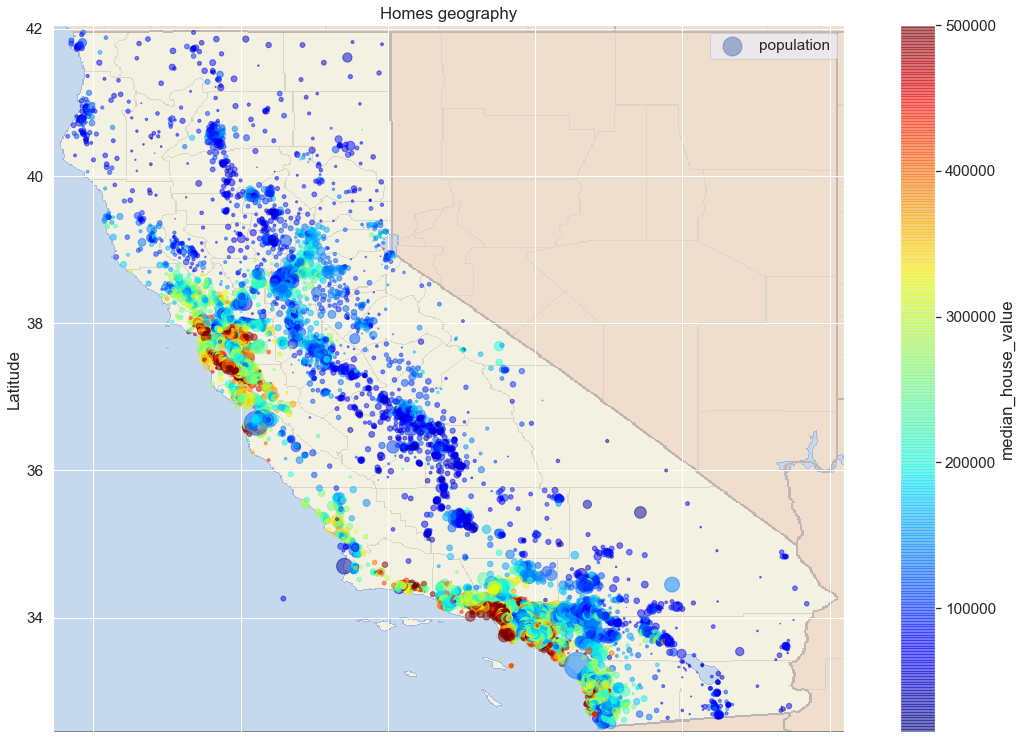

In [30]:
df.plot(kind='scatter', x='longitude', y='latitude', alpha=0.5, 
        s=df['population'] / 50, label='population', c='median_house_value', 
        cmap=plt.get_cmap('jet'), figsize=(20,13))

plt.imshow(california_map, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5)

plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Homes geography")
plt.legend() 
plt.show()